In [64]:
import pandas as pd
air = pd.read_csv("india-air-quality-data2.csv",encoding='cp1252')
s = air['state']
s = list(s)
s = list(set(s))
s.remove('Telangana')
s.remove('Uttaranchal')
print(s)

['Punjab', 'Rajasthan', 'Madhya Pradesh', 'Bihar', 'Maharashtra', 'Puducherry', 'Uttar Pradesh', 'Assam', 'Chandigarh', 'Karnataka', 'Chhattisgarh', 'Daman & Diu', 'Jharkhand', 'Haryana', 'Delhi', 'Tamil Nadu', 'Nagaland', 'Dadra & Nagar Haveli', 'Kerala', 'Gujarat', 'Odisha', 'Andhra Pradesh', 'Goa', 'Jammu & Kashmir', 'Himachal Pradesh', 'Meghalaya', 'Uttarakhand', 'Manipur', 'Arunachal Pradesh', 'Mizoram', 'West Bengal']


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [65]:
aqs = []
st_av = []
y_av = []
air['date'] = pd.to_datetime(air['date'])
for st in s:
    for y in [2001]:
        aq = air['AQI'].loc[(air['date'].dt.year == y) & (air['state']==st)]
        aq = list(aq)
        if len(aq) != 0:
            avg_aq = sum(aq)/len(aq)
            aqs.append(avg_aq)
            st_av.append(st)
            y_av.append(str(y))
            print(st,y)
print(aqs)

Punjab 2001
Rajasthan 2001
Madhya Pradesh 2001
Bihar 2001
Maharashtra 2001
Puducherry 2001
Uttar Pradesh 2001
Assam 2001
Karnataka 2001
Chhattisgarh 2001
Haryana 2001
Delhi 2001
Tamil Nadu 2001
Kerala 2001
Gujarat 2001
Odisha 2001
Andhra Pradesh 2001
West Bengal 2001
[188.1127049180328, 214.0970744680851, 136.19444444444446, 222.31944444444446, 180.14449541284404, 80.20238095238095, 236.98406862745097, 115.10416666666667, 122.3975, 78.3125, 202.78472222222223, 247.26546391752578, 92.38254310344827, 113.23019801980197, 241.34722222222223, 113.03044871794872, 120.27857142857142, 193.85597826086956]


In [66]:
trees = []
ttc = pd.read_csv("Total Tree Cover.csv")
for i in range(len(st_av)):
    t = ttc[y_av[i]].loc[ttc['States'] == st_av[i]].item()
    trees.append(t)
    print(st_av[i],y_av[i])
print(trees)

Punjab 2001
Rajasthan 2001
Madhya Pradesh 2001
Bihar 2001
Maharashtra 2001
Puducherry 2001
Uttar Pradesh 2001
Assam 2001
Karnataka 2001
Chhattisgarh 2001
Haryana 2001
Delhi 2001
Tamil Nadu 2001
Kerala 2001
Gujarat 2001
Odisha 2001
Andhra Pradesh 2001
West Bengal 2001
[4066, 21653, 83016, 9413, 55751, 71, 21291, 29656, 44437, 59983, 3280, 151, 27536, 16706, 19188, 53202, 53648, 13957]


In [67]:
X = tuple(zip(aqs,trees))
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [68]:
Kmean.cluster_centers_

array([[  188.13694329,  3396.2       ],
       [  125.05966   , 58339.5       ],
       [  172.4287502 , 21426.71428571]])

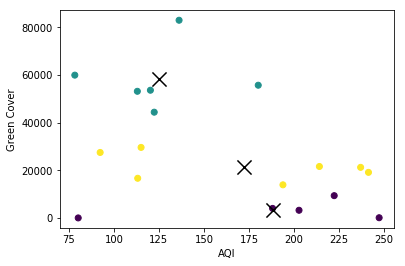

In [69]:
import matplotlib.pyplot as plt
plt.scatter(aqs,trees, c=Kmean.labels_.astype(float))
plt.scatter(172.4287502 , 21426.71428571, s=200, c='black', marker='x')
plt.scatter(125.05966   , 58339.5, s=200, c='black', marker='x')
plt.scatter(188.13694329,  3396.2, s=200, c='black', marker='x')
plt.xlabel('AQI')
plt.ylabel('Green Cover')
plt.show()

In [57]:
aqs = []
st_av = []
y_av = []
air['date'] = pd.to_datetime(air['date'])
for st in s:
    for y in [2015]:
        aq = air['AQI'].loc[(air['date'].dt.year == y) & (air['state']==st)]
        aq = list(aq)
        if len(aq) != 0:
            avg_aq = sum(aq)/len(aq)
            aqs.append(avg_aq)
            st_av.append(st)
            y_av.append(str(y))
            print(st,y)
print(aqs)

Punjab 2015
Rajasthan 2015
Madhya Pradesh 2015
Maharashtra 2015
Puducherry 2015
Uttar Pradesh 2015
Assam 2015
Chandigarh 2015
Karnataka 2015
Chhattisgarh 2015
Daman & Diu 2015
Jharkhand 2015
Haryana 2015
Delhi 2015
Tamil Nadu 2015
Nagaland 2015
Dadra & Nagar Haveli 2015
Kerala 2015
Gujarat 2015
Odisha 2015
Andhra Pradesh 2015
Goa 2015
Jammu & Kashmir 2015
Himachal Pradesh 2015
Meghalaya 2015
Uttarakhand 2015
Arunachal Pradesh 2015
Mizoram 2015
West Bengal 2015
[103.59768073547848, 126.09006499535748, 90.89779043913285, 114.34552244464665, 42.610834990059644, 137.22567384546252, 73.59005328596803, 77.02187079407807, 73.3295474547194, 96.88113006396588, 90.79545454545455, 151.92956852791878, 151.1590909090909, 200.5642954856361, 70.4748113626276, 64.90954773869346, 97.82558139534883, 45.73694779116466, 87.56018518518519, 72.4291910535117, 71.15091049980627, 45.008715862870424, 87.8861111111111, 58.97938806875763, 48.092523364485984, 147.50501672240802, 56.03658536585366, 30.8707916287534

In [58]:
trees = []
ttc = pd.read_csv("Total Tree Cover.csv")
for i in range(len(st_av)):
    t = ttc[y_av[i]].loc[ttc['States'] == st_av[i]].item()
    trees.append(t)
    print(st_av[i],y_av[i])
print(trees)

Punjab 2015
Rajasthan 2015
Madhya Pradesh 2015
Maharashtra 2015
Puducherry 2015
Uttar Pradesh 2015
Assam 2015
Chandigarh 2015
Karnataka 2015
Chhattisgarh 2015
Daman & Diu 2015
Jharkhand 2015
Haryana 2015
Delhi 2015
Tamil Nadu 2015
Nagaland 2015
Dadra & Nagar Haveli 2015
Kerala 2015
Gujarat 2015
Odisha 2015
Andhra Pradesh 2015
Goa 2015
Jammu & Kashmir 2015
Himachal Pradesh 2015
Meghalaya 2015
Uttarakhand 2015
Arunachal Pradesh 2015
Mizoram 2015
West Bengal 2015
[3315.0, 24440.0, 85235.0, 60186.0, 82.38, 21505.0, 29236.0, 31.03, 41973.0, 59215.0, 29.61, 26261.0, 2939.0, 299.77, 30850.0, 13347.0, 234.0, 22190.0, 22574.0, 54340.0, 28389.0, 2549.0, 31342.0, 15453.0, 17927.0, 24992.0, 68009.0, 19283.0, 18916.0]


In [59]:
X = tuple(zip(aqs,trees))
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [60]:
Kmean.cluster_centers_

array([[  101.07294059,  1184.97375   ],
       [   86.11804387, 65397.        ],
       [   87.19963815, 24292.375     ]])

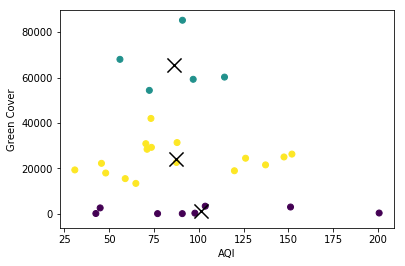

In [62]:
import matplotlib.pyplot as plt
plt.scatter(aqs, trees, c=Kmean.labels_.astype(float))
plt.scatter(101.07294059,  1184.97375, s=200, c='black', marker='x')
plt.scatter(86.11804387, 65397., s=200, c='black', marker='x')
plt.scatter(87.19963815, 24292.375, s=200, c='black', marker='x')
plt.xlabel('AQI')
plt.ylabel('Green Cover')
plt.show()

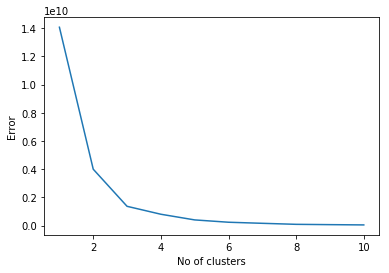

In [48]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()